## Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import colors
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

## Loading the data

In [2]:
df = pd.read_csv('data/preprocessed_data.csv')

## Visualizations of the dataset

[[1.         0.48482267]
 [0.48482267 1.        ]]


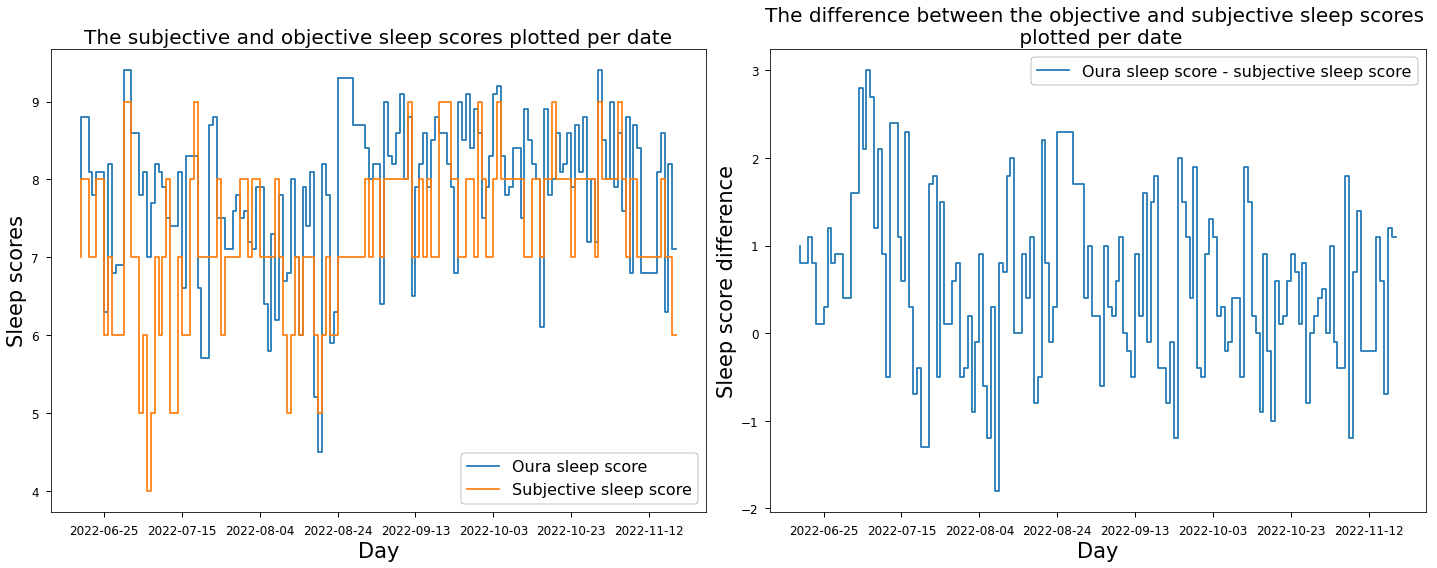

In [3]:
# Plot the subjective sleep scores (from the questionnaires) and the objective sleep scores (from the Oura ring measurements) together per date, 
# along with their difference in values
def plot_sleep_scores(df):
    plt.style.use("seaborn-notebook")
    colour_axes = "black"

    days = list(map(datetime.datetime.strptime, df['actual_day'], len(df['actual_day'])*['%Y-%m-%d']))

    sleep_scores = plt.figure(figsize=(20,8))
    ax_sleep_scores = sleep_scores.add_subplot(121)
    ax_sleep_scores.step(days, df['score'].values, label="Oura sleep score")
    ax_sleep_scores.step(days, df['subjective_sleep_score'].values, label="Subjective sleep score")
    ax_sleep_scores.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax_sleep_scores.xaxis.set_major_locator(mdates.DayLocator(interval=20))
    ax_sleep_scores.set_xlabel("Day", fontsize=21)
    ax_sleep_scores.set_ylabel("Sleep scores", fontsize=21)
    ax_sleep_scores.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
    ax_sleep_scores.set_title("The subjective and objective sleep scores plotted per date", fontsize=20)
    ax_sleep_scores.yaxis.label.set_color(colour_axes)
    ax_sleep_scores.xaxis.label.set_color(colour_axes)
    ax_sleep_scores.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')

    ax_scores_diff = sleep_scores.add_subplot(122)
    ax_scores_diff.step(days, df['score'].values - df['subjective_sleep_score'].values, label="Oura sleep score - subjective sleep score")
    ax_scores_diff.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax_scores_diff.xaxis.set_major_locator(mdates.DayLocator(interval=20))
    ax_scores_diff.set_xlabel("Day", fontsize=21)
    ax_scores_diff.set_ylabel("Sleep score difference", fontsize=21)
    ax_scores_diff.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
    ax_scores_diff.set_title("The difference between the objective and subjective sleep scores \n plotted per date", fontsize=20)
    ax_scores_diff.yaxis.label.set_color(colour_axes)
    ax_scores_diff.xaxis.label.set_color(colour_axes)
    ax_scores_diff.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')
    sleep_scores.tight_layout()
    plt.show()

print(np.corrcoef(df['score'], df['subjective_sleep_score']))
plot_sleep_scores(df)

<AxesSubplot:>

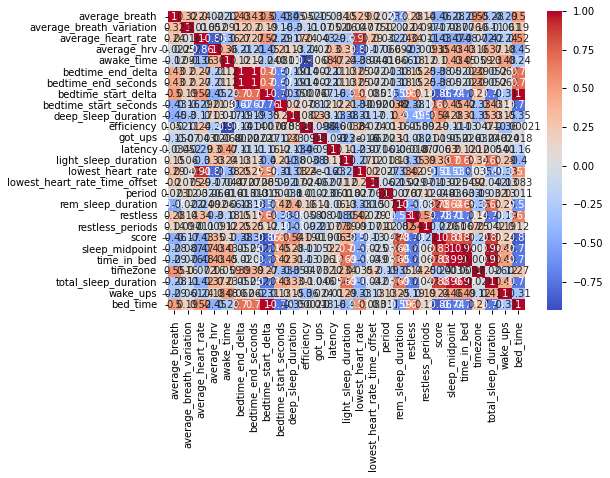

In [8]:
# Plot heatmap showing the correlation between the Oura ring variables
heatmap_data = df.iloc[:, 0:48]
heatmap_data = heatmap_data.drop(labels=['contributors.deep_sleep', 'contributors.efficiency', 'contributors.latency', 'contributors.rem_sleep', 'contributors.restfulness', 'contributors.timing', 'contributors.total_sleep', 'readiness.contributors.activity_balance', 'readiness.contributors.body_temperature', 'readiness.contributors.hrv_balance', 'readiness.contributors.previous_day_activity', 'readiness.contributors.previous_night', 'readiness.contributors.recovery_index', 'readiness.contributors.resting_heart_rate', 'readiness.contributors.sleep_balance', 'readiness.score', 'readiness.temperature_deviation', 'readiness.temperature_trend_deviation'], axis=1)
correlations = heatmap_data.corr()
sns.heatmap(correlations, cmap='coolwarm', annot=True)

In [40]:
correlations = heatmap_data.corr()
# print(type(correlations))
# print(correlations.shape)
correlations = correlations.to_numpy()
# print(type(correlations))
# print(correlations.shape)
# print(correlations)
correlations = correlations[~np.eye(correlations.shape[0],dtype=bool)].reshape(correlations.shape[0],-1)
# print(correlations.shape)
# print(correlations)
tri = np.tril(correlations, -1)
# print(tri)
# print(tri.shape)
i, j = np.where(correlations != 0) # find indices where it is nonzero 
non_zero = correlations[np.nonzero(tri)]
# print(non_zero)
# print(non_zero.shape)

# plt.hist(non_zero, bins = 10)
# plt.show()
# plt.hist(non_zero, bins = [-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]) 
# plt.hist(non_zero, bins = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]) 
# plt.title("histogram") 
# plt.show()

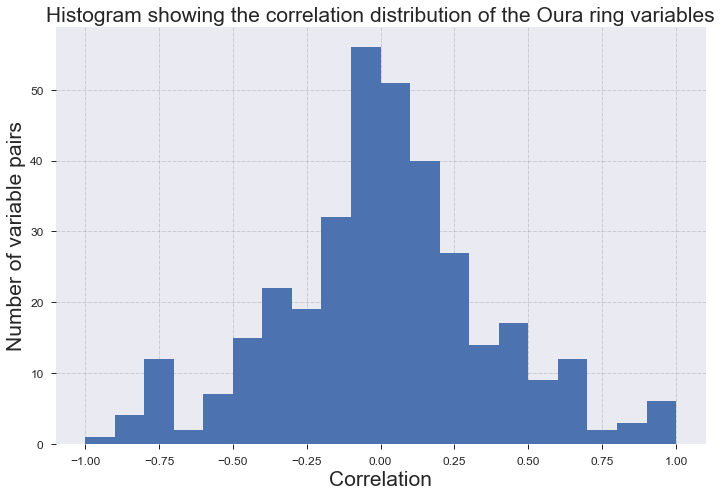

In [64]:
n_bins = [-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Creating histogram
fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
plt.style.use("seaborn")
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

axs.tick_params(axis='both', which='major', size=5, labelsize=12)

# Add x, y gridlines
axs.grid(visible = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.6)

# Creating histogram
N, bins, patches = axs.hist(non_zero, bins = n_bins)
 
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
 
# Adding extra features 
# X_axis = np.arange(len(n_bins))  
# axs.set_xticks(X_axis, n_bins, fontsize=17)
axs.set_xlabel("Correlation", fontsize=21)
axs.set_ylabel("Number of variable pairs", fontsize=21)
axs.set_title('Histogram showing the correlation distribution of the Oura ring variables', fontsize=21)

plt.show()

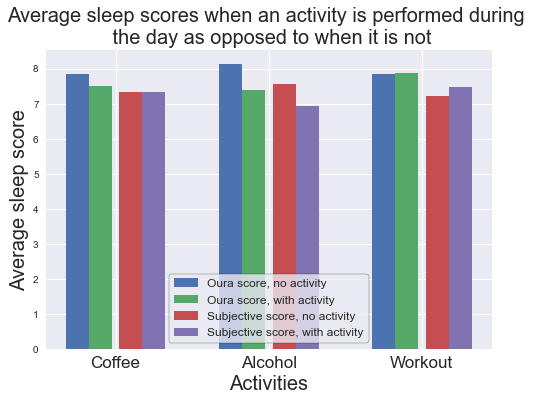

In [54]:
# Function that returns the average of an integer list
def average(lst):
    return sum(lst) / len(lst)

# Plots the average sleep scores with days when an acticity was performed as compared to those where no activity was performed
def plot_activities_effect(df):
    plt.style.use("seaborn")
    # X = ['Coffee', 'Alcohol', 'Workout', 'Stress relieving activity']
    X = ['Coffee', 'Alcohol', 'Workout']

    # Compute the average Oura sleep scores to be plotted
    average_no_coffee = average(df[pd.isna(df['coffee_time'])].score)
    average_coffee = average(df[~(pd.isna(df['coffee_time']))].score)

    average_no_alcohol = average(df[pd.isna(df['alcohol_time'])].score)
    average_alcohol = average(df[~(pd.isna(df['alcohol_time']))].score)

    average_no_workout = average(df[pd.isna(df['workout_time'])].score)
    average_workout = average(df[~(pd.isna(df['workout_time']))].score)

    # average_no_stress_relief = average(df[pd.isna(df['stress_relief_time'])].score)
    # average_stress_relief = average(df[~(pd.isna(df['stress_relief_time']))].score)

    # y_absent = [average_no_coffee, average_no_alcohol, average_no_workout, average_no_stress_relief]
    # y_present = [average_coffee, average_alcohol, average_workout, average_stress_relief]

    y_absent = [average_no_coffee, average_no_alcohol, average_no_workout]
    y_present = [average_coffee, average_alcohol, average_workout]

    # Compute the average subjective sleep scores to be plotted
    sub_average_no_coffee = average(df[pd.isna(df['coffee_time'])].subjective_sleep_score)
    sub_average_coffee = average(df[~(pd.isna(df['coffee_time']))].subjective_sleep_score)

    sub_average_no_alcohol = average(df[pd.isna(df['alcohol_time'])].subjective_sleep_score)
    sub_average_alcohol = average(df[~(pd.isna(df['alcohol_time']))].subjective_sleep_score)

    sub_average_no_workout = average(df[pd.isna(df['workout_time'])].subjective_sleep_score)
    sub_average_workout = average(df[~(pd.isna(df['workout_time']))].subjective_sleep_score)

    y_absent_sub = [sub_average_no_coffee, sub_average_no_alcohol, sub_average_no_workout]
    y_present_sub = [sub_average_coffee, sub_average_alcohol, sub_average_workout]

    X_axis = np.arange(len(X))
  
    plt.bar(X_axis - 0.25, y_absent, 0.15, label = 'Oura score, no activity')
    plt.bar(X_axis - 0.10, y_present, 0.15, label = 'Oura score, with activity')
    plt.bar(X_axis + 0.10, y_absent_sub, 0.15, label = 'Subjective score, no activity')
    plt.bar(X_axis + 0.25, y_present_sub, 0.15, label = 'Subjective score, with activity')
    
    plt.xticks(X_axis, X, fontsize=17)
    plt.xlabel("Activities", fontsize=20)
    plt.ylabel("Average sleep score", fontsize=20)
    plt.title("Average sleep scores when an activity is performed during \n the day as opposed to when it is not", fontsize=20)
    plt.legend(prop={'size': 12}, frameon=True, loc="best").get_frame().set_edgecolor('k')
    plt.show()

plot_activities_effect(df)

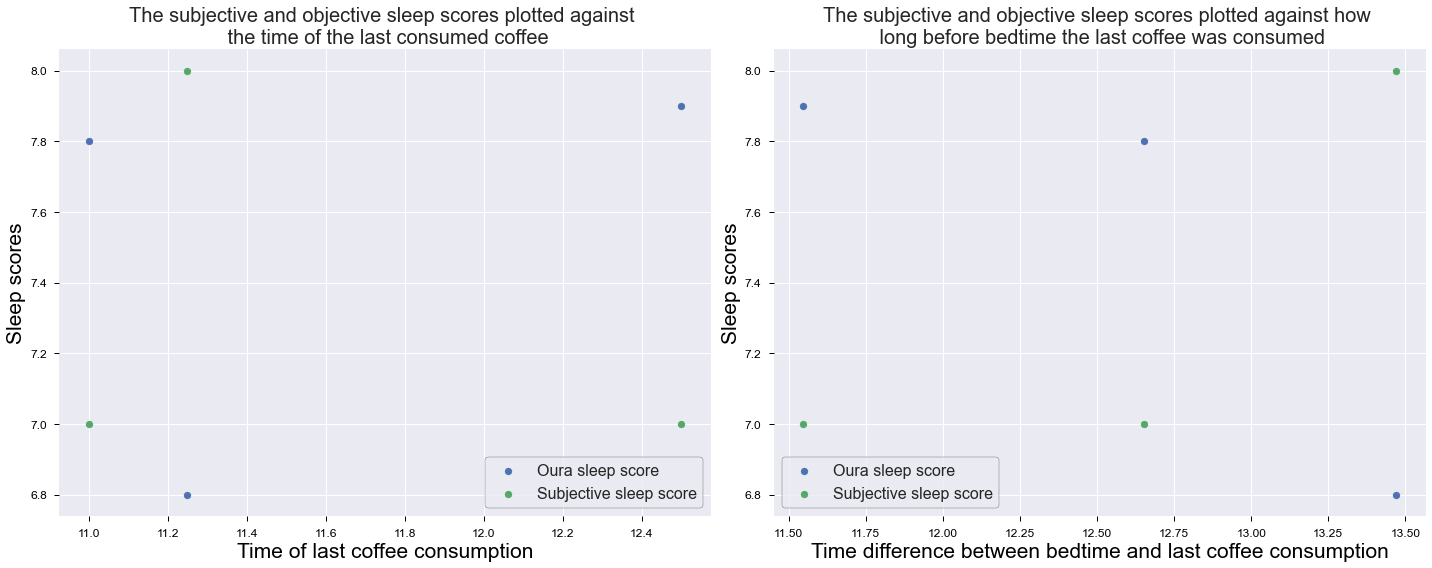

In [ ]:
# Plot the sleep scores as a function of the time of the last coffee consumption
def plot_coffee_times(df):
    coffee_days = df[~(pd.isna(df['coffee_time']))]
    plt.style.use("seaborn")
    colour_axes = "black"

    # cof_time = []
    # counter = 0
    # for index, row in coffee_days.iterrows():
    #     cof_time.append(datetime.timedelta(hours=coffee_days.iloc[counter]['coffee_time']))
    #     print(cof_time[counter])
    #     # cof_time[counter] = pd.to_datetime(cof_time[counter])
    #     counter += 1
    # print(type(cof_time[0]))
    # print(cof_time)

    time_coffee = plt.figure(figsize=(20,8))
    ax_coffee_time = time_coffee.add_subplot(121)
    # ax_coffee_time.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax_coffee_time.scatter(coffee_days['coffee_time'].values, coffee_days['score'].values, label="Oura sleep score")
    ax_coffee_time.scatter(coffee_days['coffee_time'].values, coffee_days['subjective_sleep_score'].values, label="Subjective sleep score")
    ax_coffee_time.set_xlabel("Time of last coffee consumption", fontsize=21)
    ax_coffee_time.set_ylabel("Sleep scores", fontsize=21)
    ax_coffee_time.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
    ax_coffee_time.set_title("The subjective and objective sleep scores plotted against \n the time of the last consumed coffee", fontsize=20)
    ax_coffee_time.yaxis.label.set_color(colour_axes)
    ax_coffee_time.xaxis.label.set_color(colour_axes)
    ax_coffee_time.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')

    time_before_bed = coffee_days['bed_time'].values - coffee_days['coffee_time'].values

    ax_coffee_time_diff = time_coffee.add_subplot(122)
    ax_coffee_time_diff.scatter(time_before_bed, coffee_days['score'].values, label="Oura sleep score")
    ax_coffee_time_diff.scatter(time_before_bed, coffee_days['subjective_sleep_score'].values, label="Subjective sleep score")
    ax_coffee_time_diff.set_xlabel("Time difference between bedtime and last coffee consumption", fontsize=21)
    ax_coffee_time_diff.set_ylabel("Sleep scores", fontsize=21)
    ax_coffee_time_diff.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
    ax_coffee_time_diff.set_title("The subjective and objective sleep scores plotted against how \n long before bedtime the last coffee was consumed", fontsize=20)
    ax_coffee_time_diff.yaxis.label.set_color(colour_axes)
    ax_coffee_time_diff.xaxis.label.set_color(colour_axes)
    ax_coffee_time_diff.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')
    time_coffee.tight_layout()

    plt.show()

plot_coffee_times(df)

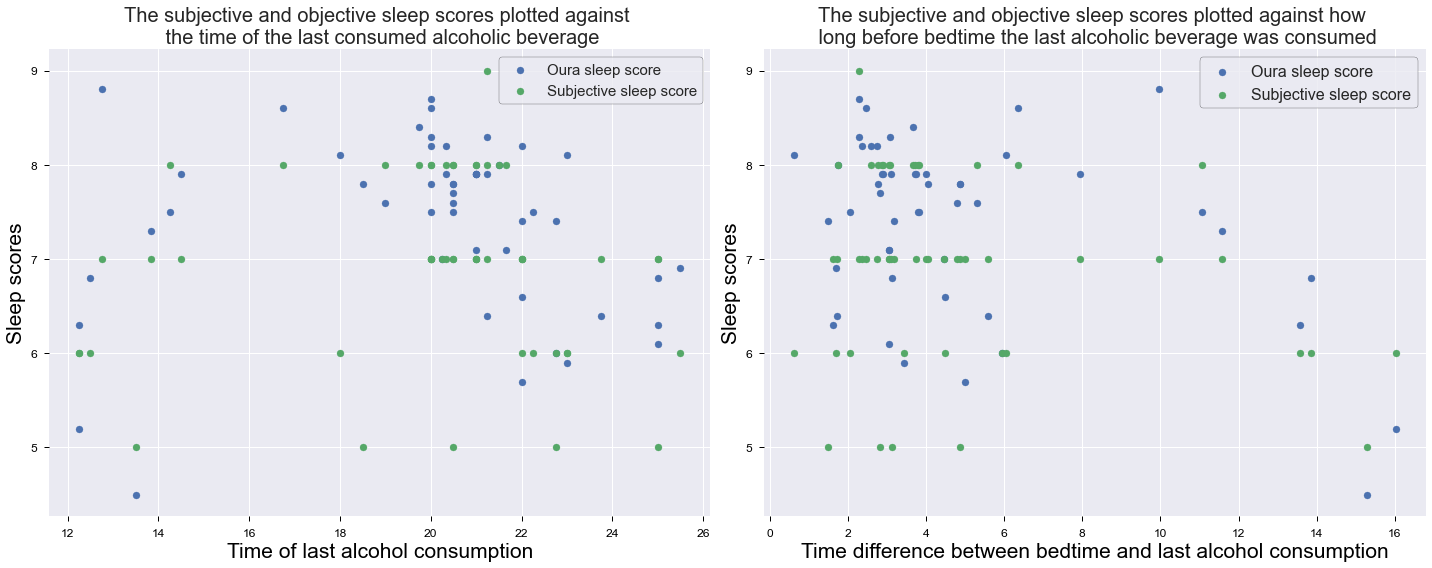

In [ ]:
# Plot the sleep scores as a function of the time of the last alcohol consumption
def plot_alcohol_times(df):
    alcohol_days = df[~(pd.isna(df['alcohol_time']))]
    plt.style.use("seaborn")
    colour_axes = "black"

    time_alcohol = plt.figure(figsize=(20,8))
    ax_alcohol_time = time_alcohol.add_subplot(121)
    ax_alcohol_time.scatter(alcohol_days['alcohol_time'].values, alcohol_days['score'].values, label="Oura sleep score")
    ax_alcohol_time.scatter(alcohol_days['alcohol_time'].values, alcohol_days['subjective_sleep_score'].values, label="Subjective sleep score")
    ax_alcohol_time.set_xlabel("Time of last alcohol consumption", fontsize=21)
    ax_alcohol_time.set_ylabel("Sleep scores", fontsize=21)
    ax_alcohol_time.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
    ax_alcohol_time.set_title("The subjective and objective sleep scores plotted against \n the time of the last consumed alcoholic beverage", fontsize=20)
    ax_alcohol_time.yaxis.label.set_color(colour_axes)
    ax_alcohol_time.xaxis.label.set_color(colour_axes)
    ax_alcohol_time.legend(prop={'size': 15}, frameon=True, loc="best").get_frame().set_edgecolor('k')
    
    time_before_bed = alcohol_days['bed_time'].values - alcohol_days['alcohol_time'].values

    ax_alcohol_time_diff = time_alcohol.add_subplot(122)
    ax_alcohol_time_diff.scatter(time_before_bed, alcohol_days['score'].values, label="Oura sleep score")
    ax_alcohol_time_diff.scatter(time_before_bed, alcohol_days['subjective_sleep_score'].values, label="Subjective sleep score")
    ax_alcohol_time_diff.set_xlabel("Time difference between bedtime and last alcohol consumption", fontsize=21)
    ax_alcohol_time_diff.set_ylabel("Sleep scores", fontsize=21)
    ax_alcohol_time_diff.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
    ax_alcohol_time_diff.set_title("The subjective and objective sleep scores plotted against how \n long before bedtime the last alcoholic beverage was consumed", fontsize=20)
    ax_alcohol_time_diff.yaxis.label.set_color(colour_axes)
    ax_alcohol_time_diff.xaxis.label.set_color(colour_axes)
    ax_alcohol_time_diff.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')
    time_alcohol.tight_layout()

    plt.show()

plot_alcohol_times(df)

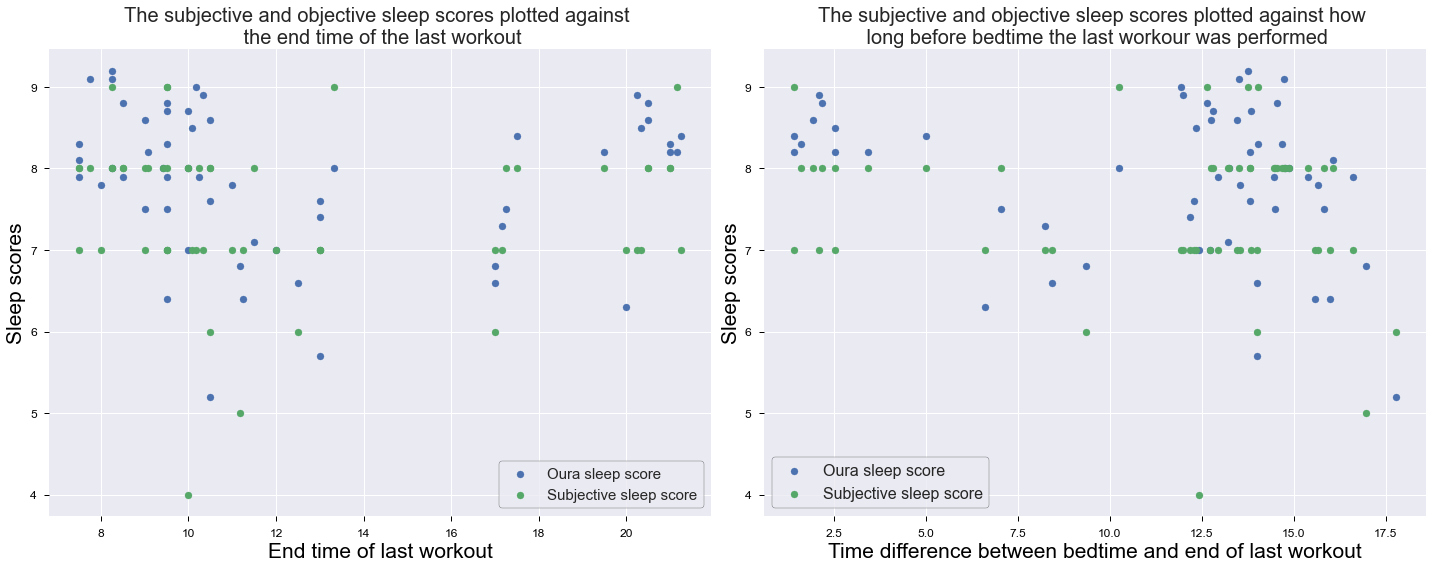

In [ ]:
# Plot the sleep scores as a function of the end time of the last workout
def plot_workout_times(df):
    workout_days = df[~(pd.isna(df['workout_time']))]
    plt.style.use("seaborn")
    colour_axes = "black"

    time_workout = plt.figure(figsize=(20,8))
    ax_workout_time = time_workout.add_subplot(121)
    ax_workout_time.scatter(workout_days['workout_time'].values, workout_days['score'].values, label="Oura sleep score")
    ax_workout_time.scatter(workout_days['workout_time'].values, workout_days['subjective_sleep_score'].values, label="Subjective sleep score")
    ax_workout_time.set_xlabel("End time of last workout", fontsize=21)
    ax_workout_time.set_ylabel("Sleep scores", fontsize=21)
    ax_workout_time.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
    ax_workout_time.set_title("The subjective and objective sleep scores plotted against \n the end time of the last workout", fontsize=20)
    ax_workout_time.yaxis.label.set_color(colour_axes)
    ax_workout_time.xaxis.label.set_color(colour_axes)
    ax_workout_time.legend(prop={'size': 15}, frameon=True, loc="best").get_frame().set_edgecolor('k')
    
    time_before_bed = workout_days['bed_time'].values - workout_days['workout_time'].values

    ax_workout_time_diff = time_workout.add_subplot(122)
    ax_workout_time_diff.scatter(time_before_bed, workout_days['score'].values, label="Oura sleep score")
    ax_workout_time_diff.scatter(time_before_bed, workout_days['subjective_sleep_score'].values, label="Subjective sleep score")
    ax_workout_time_diff.set_xlabel("Time difference between bedtime and end of last workout", fontsize=21)
    ax_workout_time_diff.set_ylabel("Sleep scores", fontsize=21)
    ax_workout_time_diff.tick_params(axis='both', colors=colour_axes, which='major', size=5, labelsize=12)
    ax_workout_time_diff.set_title("The subjective and objective sleep scores plotted against how \n long before bedtime the last workour was performed", fontsize=20)
    ax_workout_time_diff.yaxis.label.set_color(colour_axes)
    ax_workout_time_diff.xaxis.label.set_color(colour_axes)
    ax_workout_time_diff.legend(prop={'size': 16}, frameon=True, loc="best").get_frame().set_edgecolor('k')
    time_workout.tight_layout()

    plt.show()

plot_workout_times(df)